In [109]:
#importo o llamo librerias y herramientas a utilizar en este analisis EDA y modelado ML LR
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [80]:
#Instanciamos un objeto dataframe y realizamos la lectura del mismo, llamamos la intancia "df" para identificiar formatos y columnas:
df = pd.read_csv("E-Commerce_train.csv", delimiter= ";", header=0)
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


De oberservar el dataframe, inmediatamente advertimos que hay features que debemos transformar en Snumericas para que nuestro modelo pueda trabajar con ellas, (Warehouse_block, o almacen o deposito), (Mode_of_Shipment o modo de envio),(Product_importance, o importancia del producto) y por ultimo el sexo de nuestro cliente, retomaremos este punto al momento de analizar el impacto de estas features, el resultado.

In [81]:
#Usamos metodo "shape" para visualizar la amplitud del dataframe, y armo un lista de sus features para empezar a identificar con claridad las mismas
print(df.shape)
print(list(df.columns))

(8999, 12)
['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [82]:
#Identificacion de valores nulos en las columnas y sus registros, no se encuentran.
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Al explorar el df en busqueda de valores nulos, nos damos con la buena noticia que en este singular caso no los tenemos, lo que no va a ahorrar una buena cantidad de trabajo ya que hay que ser muy cuidadosos a la hora de considerar que hacer con esos datos faltantes, y por fortuna este no es el caso.

In [83]:
#Analizo el porcentaje de lo que sera nuestra variable motivo de analisis, en este caso los 'productos que llegaron a tiempo'
#Esto nos indica que nos encontramos con un data set divido en porcentajes no tan desbalanceados.
df["Reached.on.Time_Y.N"].value_counts()

1    5719
0    3280
Name: Reached.on.Time_Y.N, dtype: int64

De ver las cifras arrojadas del conteo de los valores positivos  y negativos surge el detalle que si bien hay diferencia no se nota un desbalance escandalozo en la salidad de resultados, pero aun podriamos ejecutar ajustes para balancear aun mas estas cifras. De momento avanzamos y si los resultados de entrenar y testar el modelo lo requiere volveremos sobre este punto.

Abajo analizamos la media en los costos de los productos enviados para ver que informacion nos arroja esto, y ver si tenemos alguna dato asociado a estar feature que nos pudiera ayudar a determinar que es lo que esta sucediendo con lo que no llegan a tiempo y si exisste alguna vinculacion con el precio de los mismos.

In [84]:
df["Cost_of_the_Product"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       177
1       216
2       183
3       176
4       184
       ... 
8994    217
8995    232
8996    260
8997    184
8998    145
Name: Cost_of_the_Product, Length: 8999, dtype: int64>

Como vimos antes tenemos columnas con valores  que no son numericos y en este caso elijo trabajarlas con la herramienta de creacion de variables Dummies, para asi poder disponibilizarlas para el su uso el modelo elegido.

In [85]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

Como se observo antes tenemos columnas que contienen registros que no son numericos, y de esta manera el modelo no las podra trabajar, para poder pasarlas a numeros haremos uso de una herramienta que nos provee Pandas, las variables Dummies, y por medio de una lista donde colocaremos estas columnas o features en cuestion, las transformaremos, luego uniremos estas nuevas columnas dummies, a nuestro dataframe, para poder ya trabajar con la informacion contenida en ellas. Para esto cargaremos en una lista esas columnas, y con un ciclo "for" iteraremos sobre cada una de ellas creando a partir de las mismas las nuevas columnas que surgen de aplicar la funcion "get_dummies"las que se uniran al dataframe de origen que luego de todo este proceso crecera en numero de columnas.

In [164]:
#CREANDO LAS VARIABLES DUMMIES

cat_vars=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
for var in cat_vars:
    cat_list="var"+"_"+var
    cat_list= pd.get_dummies(df[var], prefix=var)
    dfdummies=df.join(cat_list)
    df=dfdummies

ValueError: columns overlap but no suffix specified: Index(['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F'],
      dtype='object')

Al usar el metodo shape, podemos observar como si bien mantenemos los registros de nuestro df, tenemos el aumento el numero de columnas, resultado de haber transformado aquelas features a numericas, y nos fuimos de 12 a 25 columnas, por que elegimos hacer esto? Hasta este punto ignoramos cuales de estas features o columnas son las que nos arrojaran mejor correlacion, y por ende no debemos descartar informacion hasta hacer un exaustivo analisis y darle valor a los datos obtenidos o provistos por el cliente.

In [87]:
df.shape

(8999, 25)

Aqui desplegadas las 25 columnas donde se obverva el df original, mas el agregado de las que surgen de la creacion de las Variables Dummies.

In [88]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,D,Flight,4,2,177,3,low,F,44,...,1,0,1,0,0,0,1,0,1,0
1,2,F,Flight,4,5,216,2,low,M,59,...,0,1,1,0,0,0,1,0,0,1
2,3,A,Flight,2,2,183,4,low,M,48,...,0,0,1,0,0,0,1,0,0,1
3,4,B,Flight,3,3,176,4,medium,M,10,...,0,0,1,0,0,0,0,1,0,1
4,5,C,Flight,2,2,184,3,medium,F,46,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,...,1,0,0,0,1,0,1,0,1,0
8995,8996,F,Ship,5,3,232,3,medium,M,3,...,0,1,0,0,1,0,0,1,0,1
8996,8997,A,Ship,4,5,260,3,medium,F,6,...,0,0,0,0,1,0,0,1,1,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,...,0,0,0,0,1,0,0,1,1,0


En el siguiente paso buscaremos quedarnos con las columnas que efectivamente seguiremos trabajando en nuestro analisis, elimimando las que fueron desglosadas por el procedimiento anterior.

In [89]:
cat_vars=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

A continuacion observamos en una lista, los nombres de las columnas que mantenemos para seguir en nuestro trabajo.

In [90]:
data_final=df[to_keep]
data_final.columns.values

array(['ID', 'Customer_care_calls', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered',
       'Weight_in_gms', 'Reached.on.Time_Y.N', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium', 'Gender_F', 'Gender_M'], dtype=object)

In [91]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,D,Flight,4,2,177,3,low,F,44,...,1,0,1,0,0,0,1,0,1,0
1,2,F,Flight,4,5,216,2,low,M,59,...,0,1,1,0,0,0,1,0,0,1
2,3,A,Flight,2,2,183,4,low,M,48,...,0,0,1,0,0,0,1,0,0,1
3,4,B,Flight,3,3,176,4,medium,M,10,...,0,0,1,0,0,0,0,1,0,1
4,5,C,Flight,2,2,184,3,medium,F,46,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,...,1,0,0,0,1,0,1,0,1,0
8995,8996,F,Ship,5,3,232,3,medium,M,3,...,0,1,0,0,1,0,0,1,0,1
8996,8997,A,Ship,4,5,260,3,medium,F,6,...,0,0,0,0,1,0,0,1,1,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,...,0,0,0,0,1,0,0,1,1,0


En este paso usando Drop nos quedamos solamente con columnas numericas, listas para continuar trabajando.

In [92]:
df.drop(columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'])

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,4,2,177,3,44,1233,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,2,4,5,216,2,59,3088,1,0,0,...,0,1,1,0,0,0,1,0,0,1
2,3,2,2,183,4,48,3374,1,1,0,...,0,0,1,0,0,0,1,0,0,1
3,4,3,3,176,4,10,1177,1,0,1,...,0,0,1,0,0,0,0,1,0,1
4,5,2,2,184,3,46,2484,1,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,3,1,217,3,1,4177,1,0,0,...,1,0,0,0,1,0,1,0,1,0
8995,8996,5,3,232,3,3,4526,0,0,0,...,0,1,0,0,1,0,0,1,0,1
8996,8997,4,5,260,3,6,4221,0,1,0,...,0,0,0,0,1,0,0,1,1,0
8997,8998,4,2,184,3,5,5931,1,0,1,...,0,0,0,0,1,0,0,1,1,0


In [110]:
#Defino variables de salida x, y la de llegada y,  se genera el split para entrenar y testear el modelo
Y = df["Reached.on.Time_Y.N"]
X = df.drop(columns=["ID", "Reached.on.Time_Y.N"])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

Buscaremos mejorar el BALANCE del dataset por medio de la tecnica de Over-sampling, lo que se haces en esta instancia es obtener distinas muestras del dataset para homogeneizar los datos de salida con la intencion de balancear para tener un modelo sin tenencia hacia un lado o el otro de modo previo al entrenamiento. Al aplicar Over samplig, o sobre muestreo podemos observar como luego de realizado el procedimiento tendremos salidas para las 2 posibles varaciones de nuestra variable de salida de modo balanceado, lo que nos indica que estamos en condiciones de trabajar ya obvservando las mejores FEATURES,  para quedarnoslas y aplicarles el model de ML.

In [111]:
import warnings
warnings.filterwarnings('ignore')
X = data_final.loc[:, data_final.columns !='Reached.on.Time_Y.N']
Y = data_final.loc[:, data_final.columns =='Reached.on.Time_Y.N']

from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_Y = os.fit_resample(X_train,Y_train) 

os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_Y = pd.DataFrame(data=os_data_Y, columns=["Reached.on.Time_Y.N"])

#Aqui podemos chequear el tamaño de nuestra data
print("length o oversampled data is", len(os_data_X))

length o oversampled data is 8004


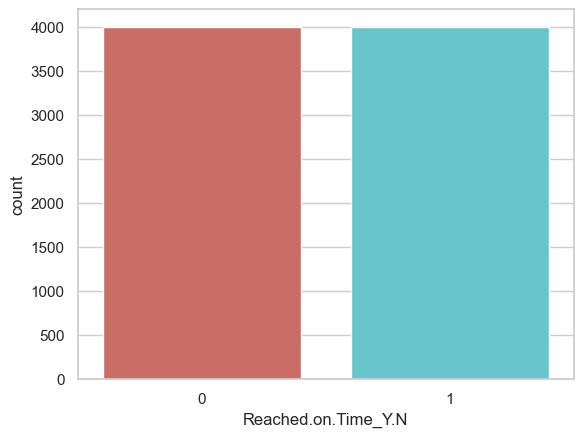

In [114]:
sns.countplot(x= "Reached.on.Time_Y.N", data = os_data_Y, palette= 'hls')
plt.show()

Buscaremos determinar cuales de estos features son importantes para el trabajo con nuestro modelo de Regresion Logistica, nos valdremos del metodo RFE que nos genera un ranking de las features que mas inciden en el resultado para poder utilizarlar y asi descartar columnas que no aportan valor core del analisi, entre las caracteristicas de esa manera podremos acercarnos a un mejor resultado.

In [115]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True  True  True  True  True
 False False False  True  True  True  True  True]
[11  8  6  9  7  5 10  1  1  1  1  1  2  4  3  1  1  1  1  1]


Una vez determinadas las columnas que nos aportan al modelo, nos diponemos a colocarlas en una lista para poder filtrar estas columnas y quedarnos con los regresores que son lo que si debemos usar en nuestro modelo, desde luego que nos quedaremos con las que nos muestra la herramienta como regresores TRUE.

In [116]:
valid_cols = rfe.support_
valid_cols = list(valid_cols)
cols = list(columns)
print(cols, valid_cols)

['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Product_importance_high', 'Product_importance_low', 'Product_importance_medium', 'Gender_F', 'Gender_M'] [False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, True, True, True, True, True]


Para continuar generamos la lista con las columnas que si trabajaremos, nos valemos de esto de la libreria itertools y del metodo compress, que nos ayuda a limpiar esta ultimo paso del EDA ya de cara a implementacion.

In [117]:
from itertools import compress 

real_cols = list(compress(cols, valid_cols))
real_cols 

['Warehouse_block_A',
 'Warehouse_block_B',
 'Warehouse_block_C',
 'Warehouse_block_D',
 'Warehouse_block_F',
 'Product_importance_high',
 'Product_importance_low',
 'Product_importance_medium',
 'Gender_F',
 'Gender_M']

Hecho esto nos disponemos a organizar nuestra informacion, ya de cara al armado del split y modelado, asignamos a  nuestras variables con las columnas que surgieron del trabajo previo para quedarnos con las que resultaron positivas en el ranking hecho con RFE, y quedamos de cara a la implementacion del modelo

In [121]:

X=os_data_X[real_cols]
Y=os_data_Y['Reached.on.Time_Y.N']

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)

LogisticRegression()

In [123]:
Y_pred = logreg.predict(X_test)

In [124]:
Y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [127]:
print('Precision del clasificador en el test set: {:.2f}' .format(logreg.score(X_test, Y_test)))

Precision del clasificador en el test set: 0.70


In [ ]:
Y_pred = logreg.predict(X_test)

In [132]:
#Realizamos el testeo de la muestra y ya damos forma un csv, previo antes del test 
Y_pred = logreg.predict(X_test)
resultado = pd.DataFrame(Y_pred ,columns=['pred']) #Convertimos los resultados a un dataframe
resultado.to_csv('Alejua.csv',index=False) #Exportamos los resultados

In [133]:
dfsalida = pd.read_csv('Alejua.csv')

dfsalida

,pred
0,1
1,1
2,1
3,1
4,1
...,...
2397,1
2398,1
2399,1
2400,1


In [176]:
dfsalida.drop(dfsalida.index[2000: ])

,pred
0,1
1,1
2,1
3,1
4,1
...,...
1995,0
1996,1
1997,0
1998,1


In [178]:
dfsalida = pd.read_csv('Alejua.csv')

A continuacion probaremos nuestro Modelo de Regresion Logistica con el dataframe de prueba que nos provee los intructores y mentores.
Cargamos el dataframe, lo visualizamos, del trabajo anterior se desprende con facilidad las columnas de las que podemos precindir.

In [137]:
df2 = pd.read_csv('E-Commerce_test.csv', delimiter=';', header=0)

df2



,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


In [159]:
df2
df2.drop(columns=["Customer_care_calls", "Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms","Mode_of_Shipment", "Customer_rating"])


,Warehouse_block,Product_importance,Gender
0,F,medium,M
1,D,high,F
2,F,low,M
3,A,medium,M
4,B,low,M
...,...,...,...
1995,A,medium,F
1996,B,medium,F
1997,C,low,F
1998,F,medium,M


In [ ]:
Y_pred = logreg.predict(df2)